In [1]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns
 

#from google.colab import drive
#drive.mount('/content/drive')

dfmovie = pd.read_csv("movies.csv")
dftag = pd.read_csv("tags.csv")
dfrating = pd.read_csv("ratings.csv")
dflink = pd.read_csv("links.csv")



In [ ]:
#print frequency of categorical feature


In [3]:
#removed those rows which had '(no genre listed)'
dfmovie = dfmovie[~(dfmovie['genres']=='(no genres listed)')].reset_index(drop=True)

In [ ]:
category=["Adventure","Animation","Children","Comedy","Crime","Fantasy","Romance","Thriller","Action","Drama","Sci-Fi","Horror","Musical","Mystery","Documentary","IMAX","Western","War","Film-Noir"]
A=[]
for cat in category:
  count=dfmovie['genres'].str.contains(cat)
  A.append(count.sum())
print(A)



[1263, 611, 664, 3756, 1199, 779, 1596, 1894, 1828, 4361, 980, 978, 334, 573, 440, 158, 167, 382, 87]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

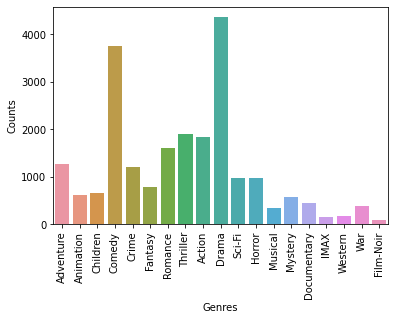

In [5]:
sns.barplot(y=A,x=category)
plt.ylabel('Counts')
plt.xlabel('Genres')
plt.xticks(rotation=90)

In [6]:
import time
dfrating['timestamp']=dfrating.timestamp.astype(np.int64)
dfrating['timestamp'] = dfrating['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
dfrating

,userId,movieId,rating,timestamp
0,1,1,4.0,2000
1,1,3,4.0,2000
2,1,6,4.0,2000
3,1,47,5.0,2000
4,1,50,5.0,2000
...,...,...,...,...
100831,610,166534,4.0,2017
100832,610,168248,5.0,2017
100833,610,168250,5.0,2017
100834,610,168252,5.0,2017


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


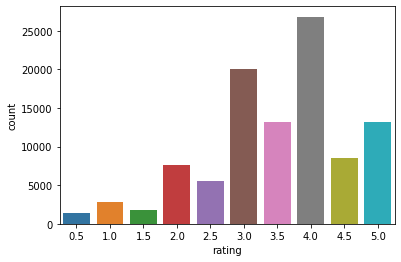

In [7]:
sns.countplot(dfrating['rating'])

conclusion: Maximum movies got rating 4 and around 45k movies got rating more than equal to 4.0

In [8]:
import time
dftag['timestamp']=dftag.timestamp.astype(np.int64)
dftag['timestamp'] = dftag['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
dftag

,userId,movieId,tag,timestamp
0,2,60756,funny,2015
1,2,60756,Highly quotable,2015
2,2,60756,will ferrell,2015
3,2,89774,Boxing story,2015
4,2,89774,MMA,2015
...,...,...,...,...
3678,606,7382,for katie,2007
3679,606,7936,austere,2007
3680,610,3265,gun fu,2017
3681,610,3265,heroic bloodshed,2017


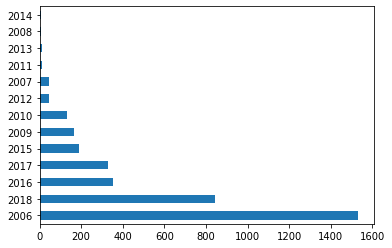

In [9]:
dftag['timestamp'].value_counts().plot(kind='barh')

maximum movies are tagged in 2006 year

 There is no categorical data in link.csv dataset hence no graph is plotted.

In [10]:
dflink.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [11]:
#Printing Nan Value in dataset

In [12]:
for column in dfmovie:
    print(column,":",dfmovie[column].isna().sum())

movieId : 0
title : 0
genres : 0


In [13]:
for column in dfrating:
    print(column,":",dfrating[column].isna().sum())

userId : 0
movieId : 0
rating : 0
timestamp : 0


In [14]:
for column in dftag:
    print(column,":",dftag[column].isna().sum())

userId : 0
movieId : 0
tag : 0
timestamp : 0


In [15]:
for column in dflink:
    print(column,":",dflink[column].isna().sum())

movieId : 0
imdbId : 0
tmdbId : 8


In [16]:
#correlation between features

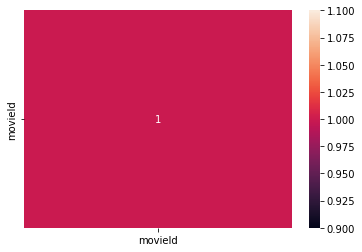

In [17]:
correlation=dfmovie.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

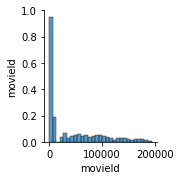

In [18]:
sns.pairplot(dfmovie)
plt.show()

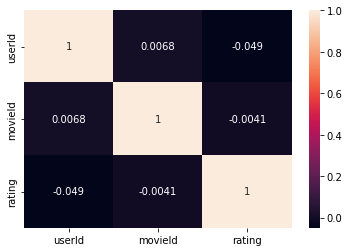

In [19]:
correlation=dfrating.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

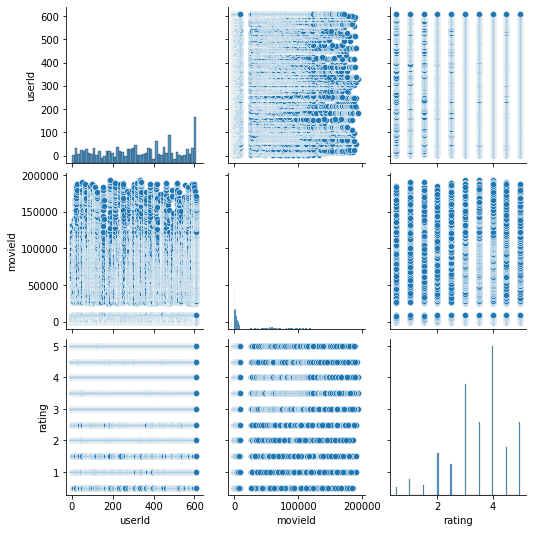

In [20]:
sns.pairplot(dfrating)
plt.show()

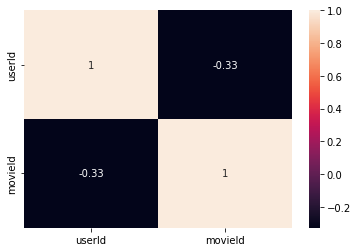

In [21]:
correlation=dftag.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

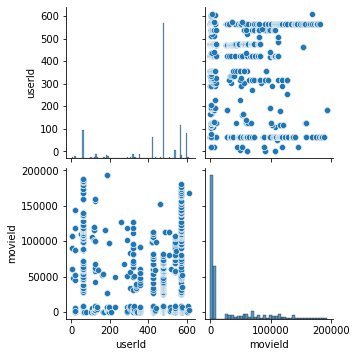

In [22]:
sns.pairplot(dftag)
plt.show()

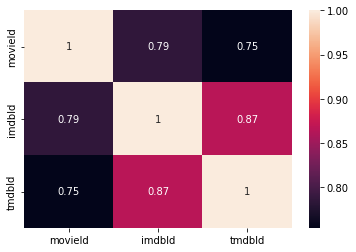

In [23]:
correlation=dflink.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

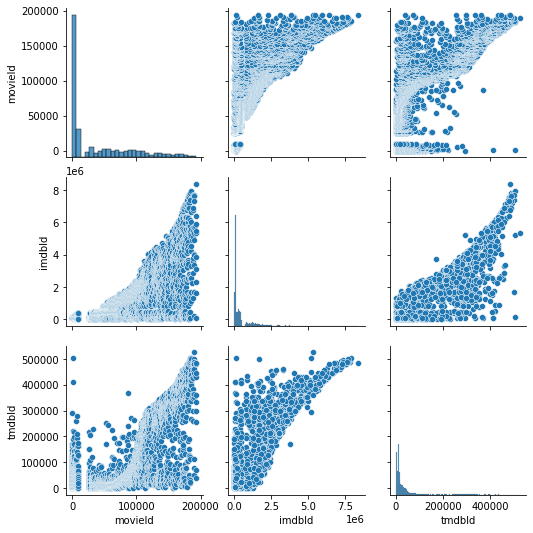

In [24]:
sns.pairplot(dflink)
plt.show()

In [25]:
import datetime
def convert_time(timestamp):
    date=datetime.datetime.fromtimestamp(
    int(timestamp)).strftime('%Y-%m-%d %H:%M:%S')
    return int(date[0:4])
dfrating['year']=dfrating['timestamp'].apply(convert_time)
dfrating

,userId,movieId,rating,timestamp,year
0,1,1,4.0,2000,1970
1,1,3,4.0,2000,1970
2,1,6,4.0,2000,1970
3,1,47,5.0,2000,1970
4,1,50,5.0,2000,1970
...,...,...,...,...,...
100831,610,166534,4.0,2017,1970
100832,610,168248,5.0,2017,1970
100833,610,168250,5.0,2017,1970
100834,610,168252,5.0,2017,1970


In [26]:
avgrate=dfrating[['timestamp','rating']].groupby('timestamp').mean()
avgrate.mean()

rating    3.542687
dtype: float64

In [27]:
def findyear(title):
    year=re.search(r'\(\d\d\d\d\)', title)
    if year:
       year=year.group()
       return int(year[1:5])
    else:
      return 0
dfmovie['year']=dfmovie['title'].apply(findyear)
#dfmovie.drop('genres',axis='columns', inplace=True)
dfmovie

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9703,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9704,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9705,193585,Flint (2017),Drama,2017
9706,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [28]:
subset=dfmovie[dfmovie['year']!=0]


Text(0.5, 1.0, 'Average ratings vs Years')

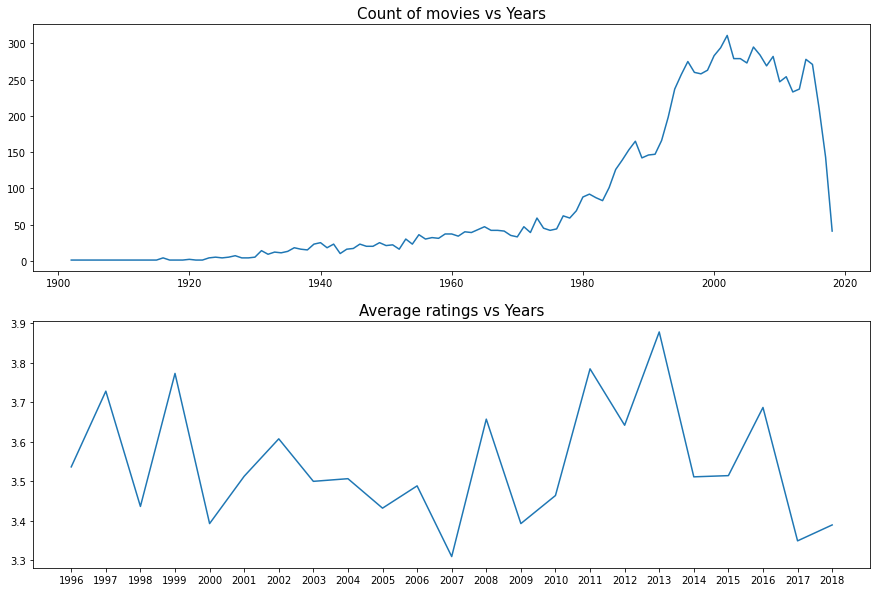

In [29]:
fig1, (ax3) = plt.subplots(2,figsize=(15,10))
plt.subplot(211)
x=subset.groupby(['year']).count()['title']
plt.plot(x)
plt.title('Count of movies vs Years',fontsize=15)
plt.subplot(212)
a2=plt.plot(avgrate)
plt.title('Average ratings vs Years',fontsize=15)


In [30]:
dftag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,2015
1,2,60756,Highly quotable,2015
2,2,60756,will ferrell,2015
3,2,89774,Boxing story,2015
4,2,89774,MMA,2015


In [31]:
dftag['tag']=dftag['tag'].str.lower() 


In [32]:
dftag['tag'].count()

3683

In [33]:
dftag['tag'].unique()

array(['funny', 'highly quotable', 'will ferrell', ..., 'austere',
       'gun fu', 'heroic bloodshed'], dtype=object)

In [34]:
dftag['tag'].value_counts(ascending=False)

in netflix queue          131
atmospheric                41
funny                      24
surreal                    24
thought-provoking          24
                         ... 
salute to douglas sirk      1
amazing                     1
creativity                  1
double life                 1
trey parker                 1
Name: tag, Length: 1475, dtype: int64

Text(0.5, 1.0, 'Count of movies vs Tag')

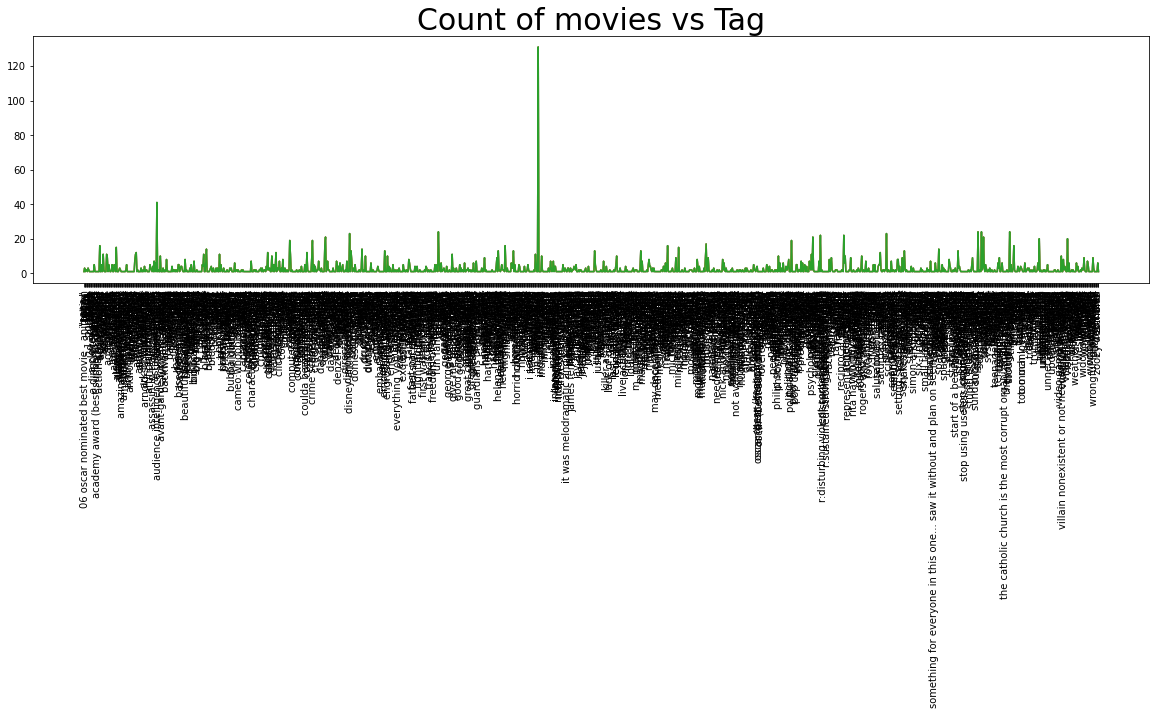

In [35]:
fig1, (ax3) = plt.subplots(1,figsize=(20,10))
plt.subplot(211)
x=dftag.groupby(['tag']).count()

plt.plot(x)
plt.xticks(rotation=90)
plt.title('Count of movies vs Tag',fontsize=30)